<a href="https://colab.research.google.com/github/poojithareddy39/Firstgithub/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [8]:
    import pandas as pd
    df = pd.read_csv('/content/sample_stock_data.csv')
    print("Dataset loaded successfully!")
    print("\nFirst few rows of your data:")
    print(df.head())
    print("\nInformation about your dataset:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())

Dataset loaded successfully!

First few rows of your data:
         Date    Open    High    Low   Close   Volume
0  2023-01-02  154.88  212.04  95.44  113.91  1926481
1  2023-01-03  171.52  205.01  92.83  142.69  3773135
2  2023-01-04  160.28  200.82  90.30  184.29  2393347
3  2023-01-05  154.49  246.48  97.10  181.80  3499925
4  2023-01-06  142.37  233.50  90.08  110.24  4134960

Information about your dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    260 non-null    object 
 1   Open    260 non-null    float64
 2   High    260 non-null    float64
 3   Low     260 non-null    float64
 4   Close   260 non-null    float64
 5   Volume  260 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.3+ KB
None

Summary statistics:
             Open        High         Low       Close        Volume
count  260.000000  260.0000

In [11]:
 target_column = 'Close'
feature_columns = [col for col in df.columns if col != target_column]
print("\nChecking for missing values:")
print(df.isnull().sum())
df.dropna(inplace=True)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df=df.set_index('Date')
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[feature_columns])
scaled_features_df = pd.DataFrame(scaled_features, columns=feature_columns)
scaled_target = df[target_column]


Checking for missing values:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [12]:
  X = scaled_features_df
  y = scaled_target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # shuffle=False for time series
  print(f"\nTraining set size: {len(X_train)}")
  print(f"Testing set size: {len(X_test)}")



Training set size: 208
Testing set size: 52


In [13]:
    model = LinearRegression()
    print("\nTraining the Linear Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete!")



Training the Linear Regression model...
Model training complete!


In [15]:
   print("\nMaking predictions on the test set...")
   predictions = model.predict(X_test)



Making predictions on the test set...


In [16]:
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print("\n--- Model Evaluation ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")



--- Model Evaluation ---
Mean Squared Error (MSE): 932.4769
Mean Absolute Error (MAE): 26.3147


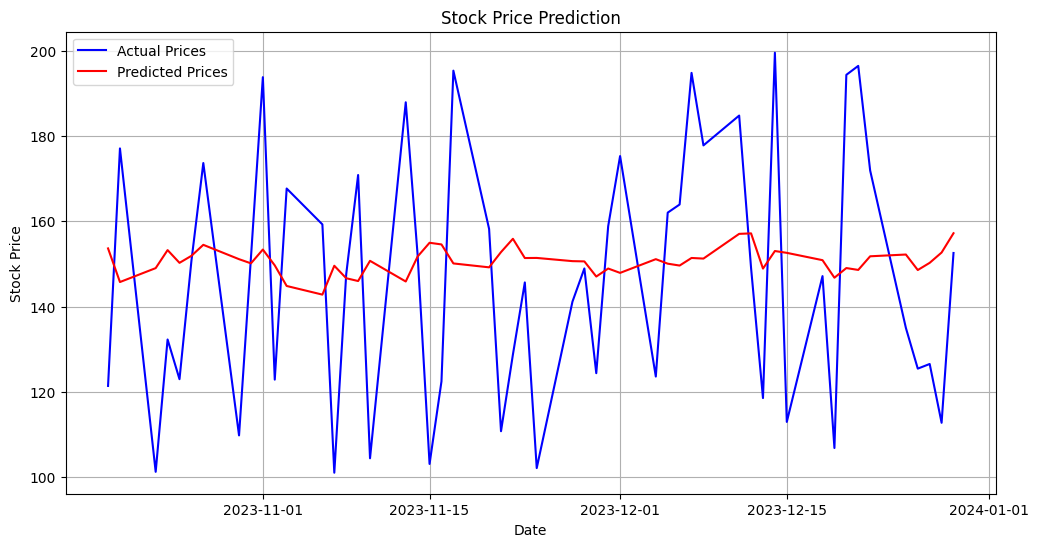

In [17]:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, predictions, label='Predicted Prices', color='red')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

